# Bivariate EDA Analisis

### Key Business Questions:

1.  **Seasonal & Source Dynamics:** 
    How does production efficiency shift across seasons for each energy source? Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

2.  **Long-Term Trends:** 
    Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).

3.  **Monthly Consistency:** 
    Are production patterns consistent across the same month in different years, or do we observe significant anomalies driven by external factors (e.g., extreme weather events)?

## Open the cleaned data

In [1]:
import pandas as pd

csv_filename = "cleaned-wind-and-solar-energy.csv"
df = pd.read_csv(csv_filename, index_col=0)

In [2]:
df.head()

,Source,Month_Name,Season,Production,Year,Month
0,Wind,November,Fall,5281,2025,11
1,Wind,November,Fall,3824,2025,11
2,Wind,November,Fall,3824,2025,11
3,Wind,November,Fall,6120,2025,11
4,Wind,November,Fall,4387,2025,11


## 1. **Seasonal & Source Dynamics:** 

**Business Question**: 
- 1.1 How does production efficiency shift across seasons for each energy source?
- 1.2 Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

In [3]:
# Data frequency and proportions by Season and Source
# How many observations belong to this Season–Source combination?
crosstab_source_season = pd.crosstab(df["Season"], df["Source"])
display(crosstab_source_season)

crosstab_source_season_percent = round(pd.crosstab(df["Season"], df["Source"], normalize="index") * 100, 2)
display(crosstab_source_season_percent)


Source,Solar,Wind
Season,,
Fall,1961,11149
Spring,2547,10694
Summer,4172,9075
Winter,698,11566


Source,Solar,Wind
Season,,
Fall,14.96,85.04
Spring,19.24,80.76
Summer,31.49,68.51
Winter,5.69,94.31


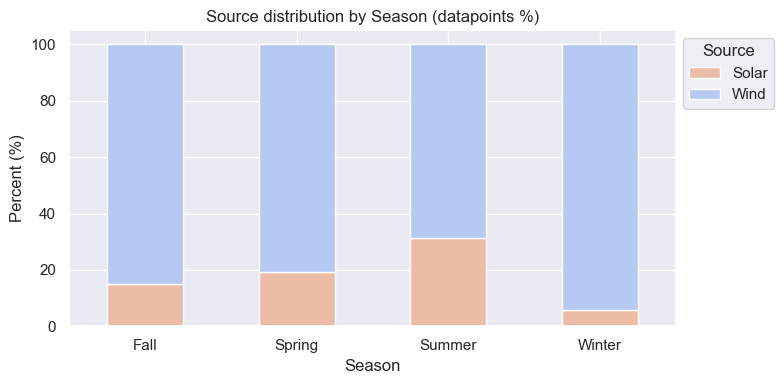

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
colors = ["#ecbca7", "#b6c9f3"]  # Solar, Wind

ax = crosstab_source_season_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(8,4),
    color=colors,
)

plt.title("Source distribution by Season (datapoints %)")
plt.xlabel("Season")
plt.ylabel("Percent (%)")
plt.legend(title="Source", bbox_to_anchor=(1.0, 1), loc="upper left")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



In [23]:
from IPython.display import Markdown

report = f"""

### Initial exploration: Season vs. Source

When examining the percentage of energy source datapoints by season, wind dominates across all periods, with this trend particularly pronounced in winter.
Solar datapoints increase notably during summer months. While these percentages reflect dataset composition rather than actual production levels, they likely
correspond to periods of higher generation when more data is collected. It's worth noting that the original dataset contained no null or zero values, which may
explain the distribution patterns observed.

**The data reveals clear seasonal patterns:** solar records peak in summer ~{round(crosstab_source_season_percent.Solar.Summer,2)} and drop sharply in winter ~{round(crosstab_source_season_percent.Solar.Winter, 2)},
with spring and fall showing intermediate levels.
Wind energy follows the inverse pattern, reaching ~{round(crosstab_source_season_percent.Wind.Winter,2)} in winter and declining to ~{round(crosstab_source_season_percent.Wind.Summer,2)} in summer.

"""
display(Markdown(report))




### Initial exploration: Season vs. Source

When examining the percentage of energy source datapoints by season, wind dominates across all periods, with this trend particularly pronounced in winter.
Solar datapoints increase notably during summer months. While these percentages reflect dataset composition rather than actual production levels, they likely
correspond to periods of higher generation when more data is collected. It's worth noting that the original dataset contained no null or zero values, which may
explain the distribution patterns observed.

**The data reveals clear seasonal patterns:** solar records peak in summer ~31.49 and drop sharply in winter ~5.69,
with spring and fall showing intermediate levels.
Wind energy follows the inverse pattern, reaching ~94.31 in winter and declining to ~68.51 in summer.



### 1.1 Production efficiency in relation to seasons and energy source

Text(0.5, 1.0, 'Average Production by Season')

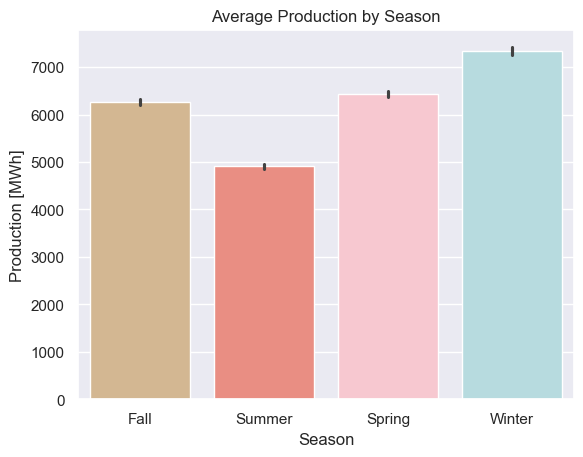

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colors based on the temperature of the month
seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}
season_order = df.Season.unique()

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            palette=seasons_palette,
            hue="Season",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season")

In [7]:
mean_prod_season = df[["Season","Production"]].groupby(["Season"]).mean()
mean_prod_season

,Production
Season,
Fall,6266.110908
Spring,6425.926969
Summer,4911.355779
Winter,7341.794684


In [26]:

report = f"""

### Insights: Average Production by Season

Consistent with the frequency of records observed earlier, average energy production peaks in Winter ({round(mean_prod_season.Production.Winter,2)}),
and drops in Summer ({round(mean_prod_season.Production.Summer,2)}) probably due to the dominance of the Wind source in the dataset.
This seasonal disparity might point to a grid instability if demand stays high during Summer months.  
"""
display(Markdown(report))



### Insights: Average Production by Season

Consistent with the frequency of records observed earlier, average energy production peaks in Winter (7341.79),
and drops in Summer (4911.36) probably due to the dominance of the Wind source in the dataset.
This seasonal disparity might point to a grid instability if demand stays high during Summer months.  


Text(0.5, 1.0, 'Average Production by Season and Source')

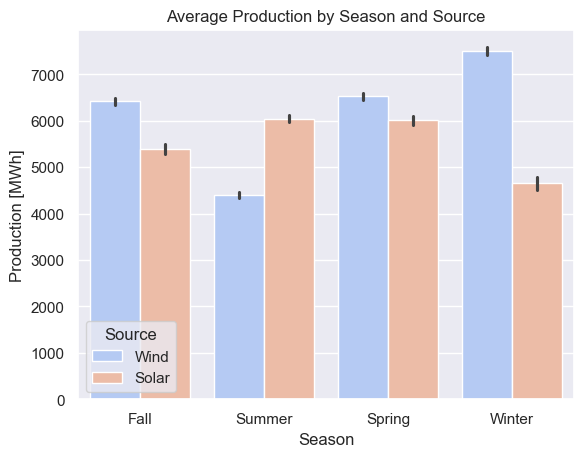

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

season_order = df.Season.unique()

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season and Source")

In [48]:
report = f"""

### Observation: Average Production by Season and Source

Average energy production in Fall and Spring follows a similar pattern where Wind sources dominate,
though Solar production remains significant. As previously noted regarding Summer, Solar energy is more
prominent, whereas Wind energy dominates in Winter.
It is important to note that these values represent the **mean** output, not the total production volume.
 
"""
display(Markdown(report))



### Observation: Average Production by Season and Source

Average energy production in Fall and Spring follows a similar pattern where Wind sources dominate,
though Solar production remains significant. As previously noted regarding Summer, Solar energy is more
prominent, whereas Wind energy dominates in Winter.
It is important to note that these values represent the **mean** output, not the total production volume.



Text(0.5, 1.0, 'Boxplot: Production by Season and Source')

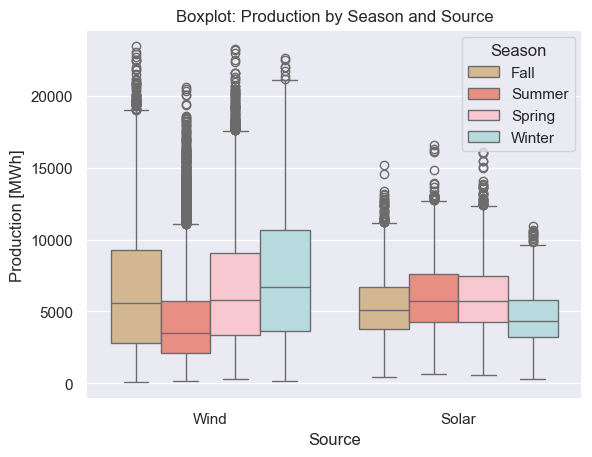

In [29]:
seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}

sns.boxplot(df,
            y = "Production",
            x = "Source",
            palette=seasons_palette,
            hue = "Season",
            legend=True)

plt.ylabel("Production [MWh]")
plt.title ("Boxplot: Production by Season and Source")

In [34]:
# statistical data
summary = df[["Source", "Production", "Season"]].groupby(["Season", "Source"]).describe()
display(summary)

Production                                                   \
                   count         mean          std    min     25%     50%   
Season Source                                                               
Fall   Solar      1961.0  5386.830189  2327.507103  428.0  3762.0  5082.0   
       Wind      11149.0  6420.767782  4334.834702   58.0  2820.0  5581.0   
Spring Solar      2547.0  6009.738123  2440.833148  553.0  4238.0  5753.0   
       Wind      10694.0  6525.051057  3974.388910  274.0  3355.0  5767.5   
Summer Solar      4172.0  6044.805369  2418.667444  633.0  4259.5  5734.0   
       Wind       9075.0  4390.281212  3160.033830  140.0  2125.0  3484.0   
Winter Solar       698.0  4649.541547  1996.051987  267.0  3234.5  4370.0   
       Wind      11566.0  7504.270275  4599.198881  166.0  3653.0  6736.0   

                                  
                    75%      max  
Season Source                     
Fall   Solar    6730.00  15201.0  
       Wind     9299.00  23446.0  
Spring Solar    7495.50  16121.0  
       Wind     9054.00  23264.0  
Summer Solar    7623.00  16578.0  
       Wind     5706.50  20606.0  
Winter Solar    5816.25  10963.0  
       Wind    10647.00  22634.0

In [46]:
from IPython.display import Markdown

report = f"""

### Insights: Boxplot

In general terms, Wind production exhibits significantly higher variability across all seasons, characterized by a wider interquartile range (IQR) and a high frequency of extreme outliers.
This volatility suggests that while Wind can generate massive peaks (exceeding 20,000 MWh), it is less predictable.
In contrast, Solar energy displays a more stable profile with a narrower IQR and fewer extreme outliers.
Notably, the median Solar production remains surprisingly consistent across seasons, indicating a more reliable output compared to the Wind.
It is important to note that these patterns are specific to France. Other regions may exhibit significantly different seasonal profiles depending on their latitude and local climate.
"""
display(Markdown(report))




### Insights: Boxplot

In general terms, Wind production exhibits significantly higher variability across all seasons, characterized by a wider interquartile range (IQR) and a high frequency of extreme outliers.
This volatility suggests that while Wind can generate massive peaks (exceeding 20,000 MWh), it is less predictable.
In contrast, Solar energy displays a more stable profile with a narrower IQR and fewer extreme outliers.
Notably, the median Solar production remains surprisingly consistent across seasons, indicating a more reliable output compared to the Wind.
It is important to note that these patterns are specific to France. Other regions may exhibit significantly different seasonal profiles depending on their latitude and local climate.


### 1.2 Grid Stability

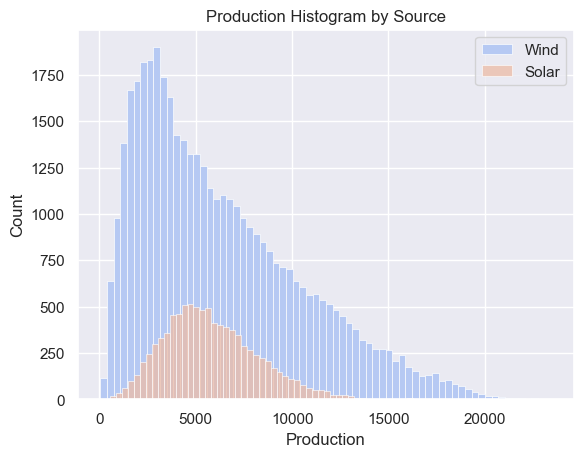

In [12]:
wind = df[df.Source == "Wind"]
solar = df[df.Source == "Solar"]

sns.histplot(data = wind, x = "Production", bins="auto", color="#b6c9f3", alpha=1, label = "Wind")
sns.histplot(data = solar, x = "Production", bins="auto", color="#ecbca7", label = "Solar")
colors = ["#ecbca7", "#b6c9f3"]  # Wind, Solar

plt.title("Production Histogram by Source")
plt.legend()
plt.show()



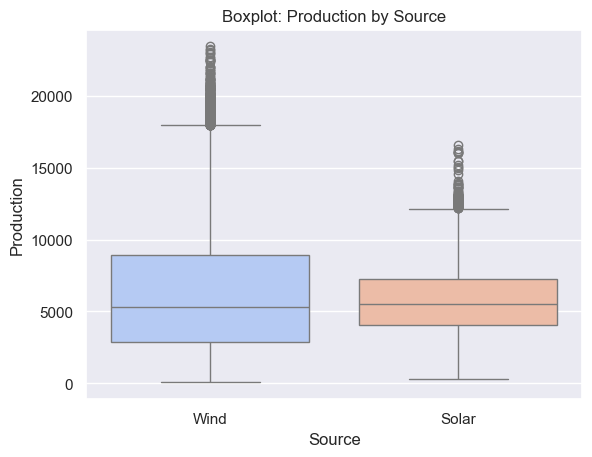

In [49]:
sns.boxplot(df,
            y = "Production",
            x = "Source",
            palette="coolwarm",
            hue = "Source",
            legend=False)

plt.title("Boxplot: Production by Source")
plt.show()


In [ ]:
from IPython.display import Markdown

report = f"""

### Insight: Wind and Solar energy distribution 

The histogram reveals two distinct patterns: Solar production approximates a Gaussian distribution, whereas Wind energy exhibits a strong right-skew.
This confirms the trends observed in the univariate analysis of the global histogram.

Insight: 

The difference in amplitude of the histograms between the two sources shows the imbalance that exists
in the dataset, and confirms the current impossibility of the Solar source being unable to prevent the drop
in total energy production.
To compensate the drop in energy in colder months, it would be beneficial to invest in additional power plants
of mixed energy sources.

An important point to notice is that, even though the average Solar production drops in winter,
it is still able to produce significant energy levels throughout the seasons, including the winter.
That is exactly the pattern we see in the boxplot for the Solar energy across seasons, and the boxplot
for the aggregate of seasons. The median for both Solar and Wind remain similar in magnitude, but the
IQR for the Wind source is significantly wider, with more outliers.
Thus, the solar energy remains as a feasible alternative to provide grid stability during the seasons
provided the energy demand remains high.

It is important to notice that when we mention grid stability we are not analyzing the hourly demand
of energy by the grid, and is out of the scope of the current report.

"""
display(Markdown(report))



### Insight: Wind and Solar energy distribution 

The histogram reveals two distinct patterns. The shape of the Solar production approximates a Gaussian,
whereas Wind energy shows a strong right-skew distribution, consistent with the univariate analysis
for the global histogram. 


Insight: 

The difference in amplitude of the histograms between the two sources shows the imbalance that exists
in the dataset, and confirms the current impossibility of the Solar source being unable to prevent the drop
in total energy production.
To compensate the drop in energy in colder months, it would be beneficial to invest in additional power plants
of mixed energy sources.

An important point to notice is that, even though the average Solar production drops in winter,
it is still able to produce significant energy levels throughout the seasons, including the winter.
That is exactly the pattern we see in the boxplot for the Solar energy across seasons, and the boxplot
for the aggregate of seasons. The median for both Solar and Wind remain similar in magnitude, but the
IQR for the Wind source is significantly wider, with more outliers.
Thus, the solar energy remains as a feasible alternative to provide grid stability during the seasons
provided the energy demand remains high.

It is important to notice that when we mention grid stability we are not analyzing the hourly demand
of energy by the grid, and is out of the scope of the current report.



## 2.  **Long-Term Trends:** 

Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).

In [15]:
# Total Year Production by year and production source
df[["Year", "Source", "Production"]].groupby(["Year", "Source"]).agg(["sum", "mean", "median", "std"])

Production                                  
                   sum         mean  median          std
Year Source                                             
2020 Solar     4700080  3900.481328  3899.0  1296.497735
     Wind     42202441  5569.073766  4931.5  3425.617308
2021 Solar     6458219  4484.874306  4470.5  1643.173441
     Wind     39259471  5363.315710  4504.5  3591.438148
2022 Solar    10555892  5684.379106  5679.0  1963.833835
     Wind     39189831  5678.039844  4545.5  3929.231618
2023 Solar     9715845  6525.080591  6530.0  2220.664851
     Wind     53744024  7391.558795  6679.0  4682.096505
2024 Solar    10420592  6195.357907  6091.5  2446.135402
     Wind     48705535  6858.002675  5799.5  4747.794271
2025 Solar    12484057  7322.027566  7138.0  2682.526557
     Wind     44898926  7114.391697  6113.0  4480.914924

Text(0.5, 1.0, 'Total Production by Source from 2020-2025')

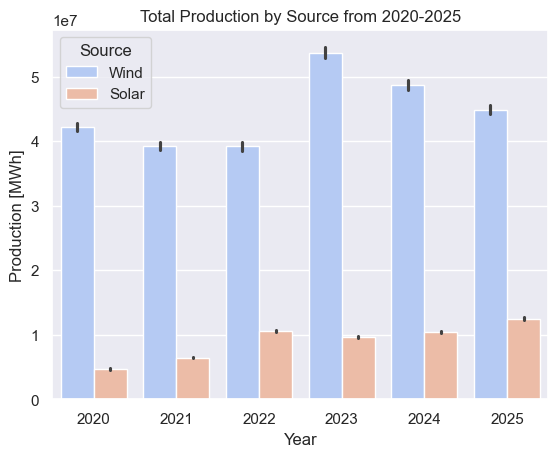

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='sum')

plt.ylabel("Production [MWh]")
plt.title ("Total Production by Source from 2020-2025")

# Wind dominates dataset, so its normal it might have higher total production

Text(0.5, 1.0, 'Total Production from 2020-2025')

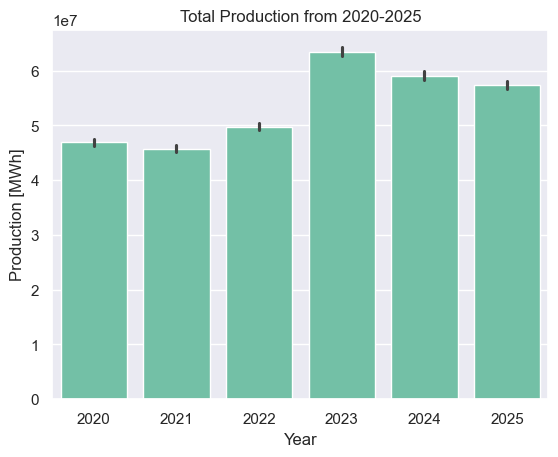

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            color="mediumaquamarine",
            estimator='sum')

plt.ylabel("Production [MWh]")
plt.title ("Total Production from 2020-2025")

# Wind dominates dataset, so its normal it might have higher total production

Text(0.5, 1.0, 'Mean Production by Source from 2020-2025')

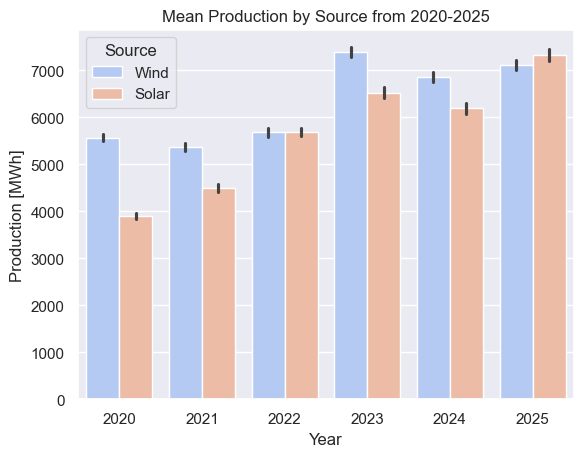

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='mean')

plt.ylabel("Production [MWh]")
plt.title ("Mean Production by Source from 2020-2025")

# By mean production they are less different

Text(0.5, 1.0, 'Average Production by Season from 2020-2025')

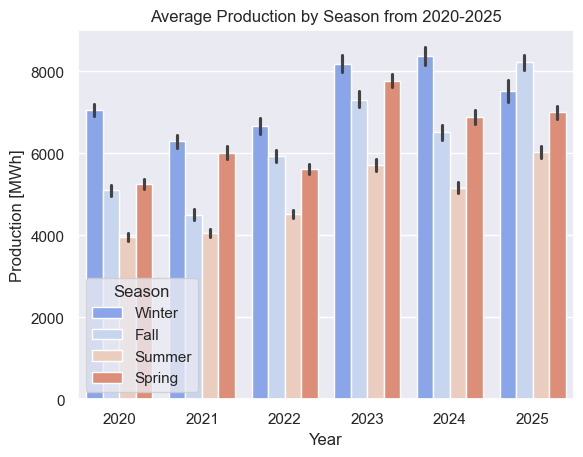

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# TODO:  chang colors to seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Season",
            palette="coolwarm")

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season from 2020-2025")